In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt  

from pandas import DataFrame, Series

# Load Data

### Nacimientos dataset

In [3]:
Nacimientos = pd.read_csv("combined.csv")
Nacimientos = pd.DataFrame(Nacimientos)
Nacimientos.head()

,fecha_nac,edad_gestal,talla,peso,procedimiento,entidad,sexo
0,31/10/2008,38,50,3500,CESÁREA,AGUASCALIENTES,NaN
1,27/02/2008,38,50,3250,CESÁREA,AGUASCALIENTES,NaN
2,30/01/2008,40,47,3020,EUTÓCICO,AGUASCALIENTES,NaN
3,11/08/2008,39,50,4050,CESÁREA,AGUASCALIENTES,NaN
4,12/05/2008,38,49,2700,EUTÓCICO,AGUASCALIENTES,NaN


In [4]:
Nacimientos['procedimiento'].unique()

array(['CESÁREA', 'EUTÓCICO', 'OTRO', 'NO ESPECIFICADO', 'FARCEPS',
       'DISTACICO'], dtype=object)

In [5]:
Nacimientos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965419 entries, 0 to 29965418
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   fecha_nac      object 
 1   edad_gestal    int64  
 2   talla          int64  
 3   peso           int64  
 4   procedimiento  object 
 5   entidad        object 
 6   sexo           float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.6+ GB


In [6]:
## Nulos
Nacimientos.isna().sum() 

fecha_nac               0
edad_gestal             0
talla                   0
peso                    0
procedimiento           0
entidad                 0
sexo             19081795
dtype: int64

In [7]:
Nacimientos_df = Nacimientos
Nacimientos_df =pd.DataFrame(Nacimientos_df)

In [8]:
## Quitar los valores de No especificado ej.99,9999
Nacimientos_df['edad_gestalN'] = Nacimientos_df['edad_gestal'].apply(lambda x: np.nan if x == 99 else x)
Nacimientos_df['tallaN'] = Nacimientos_df['talla'].apply(lambda x: np.nan if x == 99 else x)
Nacimientos_df['pesoN'] = Nacimientos_df['peso'].apply(lambda x: np.nan if x == 9999 else x)
Nacimientos_df=Nacimientos_df.drop(['edad_gestal','peso','talla'], axis=1)
Nacimientos_df.head()



,fecha_nac,procedimiento,entidad,sexo,edad_gestalN,tallaN,pesoN
0,31/10/2008,CESÁREA,AGUASCALIENTES,NaN,38.0,50.0,3500.0
1,27/02/2008,CESÁREA,AGUASCALIENTES,NaN,38.0,50.0,3250.0
2,30/01/2008,EUTÓCICO,AGUASCALIENTES,NaN,40.0,47.0,3020.0
3,11/08/2008,CESÁREA,AGUASCALIENTES,NaN,39.0,50.0,4050.0
4,12/05/2008,EUTÓCICO,AGUASCALIENTES,NaN,38.0,49.0,2700.0


In [9]:
Nacimientos_df.isna().sum() 

fecha_nac               0
procedimiento           0
entidad                 0
sexo             19081795
edad_gestalN        96077
tallaN             699273
pesoN             1582155
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Transformar la columna "procedimiento"
Nacimientos_df['procedimiento'] = le.fit_transform(Nacimientos_df['procedimiento'])
Nacimientos_df['entidad'] = le.fit_transform(Nacimientos_df['entidad'])

Nacimientos_df

,fecha_nac,procedimiento,entidad,sexo,edad_gestalN,tallaN,pesoN
0,31/10/2008,0,0,NaN,38.0,50.0,3500.0
1,27/02/2008,0,0,NaN,38.0,50.0,3250.0
2,30/01/2008,2,0,NaN,40.0,47.0,3020.0
3,11/08/2008,0,0,NaN,39.0,50.0,4050.0
4,12/05/2008,2,0,NaN,38.0,49.0,2700.0
...,...,...,...,...,...,...,...
29965414,17/11/2022,5,32,2.0,39.0,49.0,3000.0
29965415,26/11/2022,5,27,1.0,25.0,32.0,740.0
29965416,10/11/2022,0,7,1.0,36.0,49.0,2850.0
29965417,17/11/2022,2,1,1.0,38.0,49.0,2750.0


In [11]:
Description = Nacimientos_df.describe()
Description= Description.drop(columns=['sexo','procedimiento', 'entidad'], errors='ignore',index='count' )
Description

,edad_gestalN,tallaN,pesoN
mean,38.718992,49.867611,3142.630701
std,1.789191,2.738110,472.837623
min,0.000000,0.000000,20.000000
25%,38.000000,49.000000,2880.000000
50%,39.000000,50.000000,3150.000000
75%,40.000000,51.000000,3450.000000
max,49.000000,84.000000,8700.000000


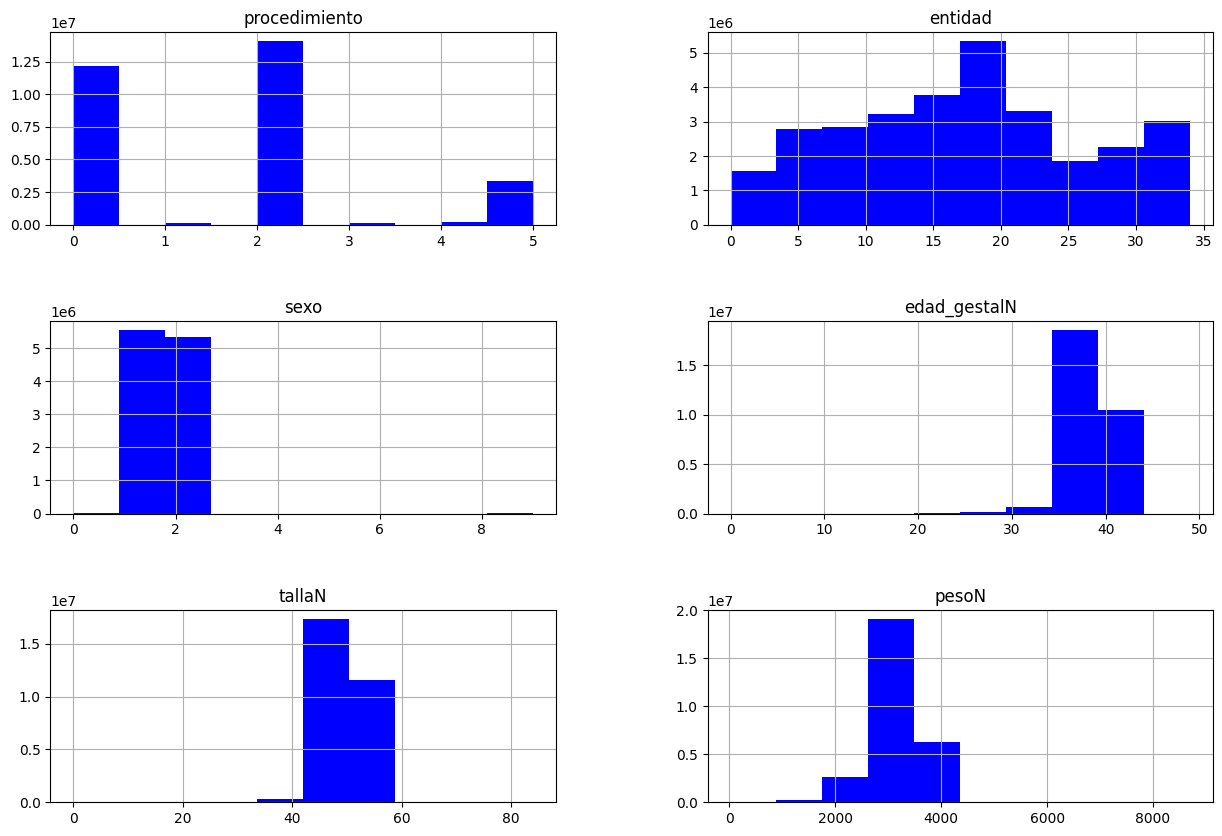

In [12]:
ax = Nacimientos_df.hist(color='blue', bins=10, figsize=(15, 10))

# Ajusta el espaciado horizontal y vertical
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Muestra los histogramas
plt.show()

In [13]:
from scipy import stats
for columna in Nacimientos_df.select_dtypes(include=[float, int]).columns:
    stat, p_value = stats.shapiro(Nacimientos_df[columna])
    if p_value > 0.05:
        print(f"La columna '{columna}' parece seguir una distribución normal (p-value = {p_value:.5f}).")
    else:
        print(f"La columna '{columna}' no sigue una distribución normal (p-value = {p_value:.5f}).")

C:\Users\adrpm\AppData\Local\Temp\ipykernel_4084\1564432167.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29965419.
  stat, p_value = stats.shapiro(Nacimientos_df[columna])


La columna 'procedimiento' no sigue una distribución normal (p-value = 0.00000).
La columna 'entidad' no sigue una distribución normal (p-value = 0.00000).
La columna 'sexo' parece seguir una distribución normal (p-value = 1.00000).
La columna 'edad_gestalN' parece seguir una distribución normal (p-value = 1.00000).
La columna 'tallaN' parece seguir una distribución normal (p-value = 1.00000).
La columna 'pesoN' parece seguir una distribución normal (p-value = 1.00000).


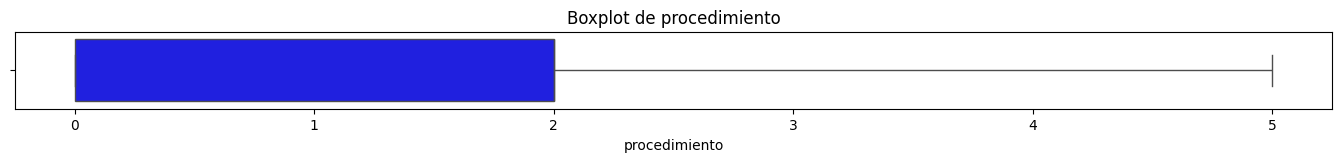

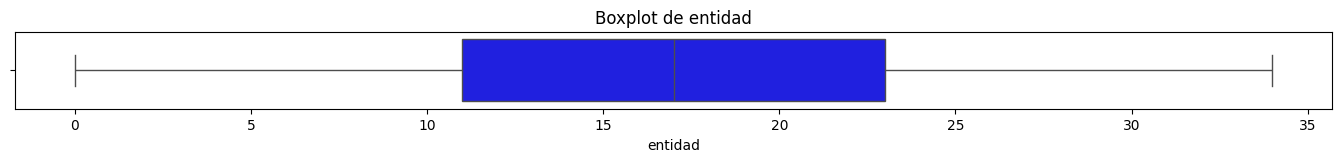

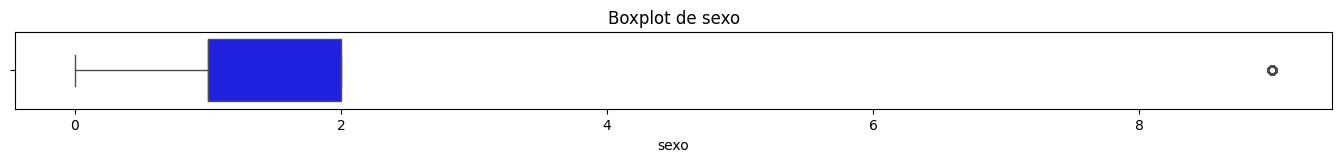

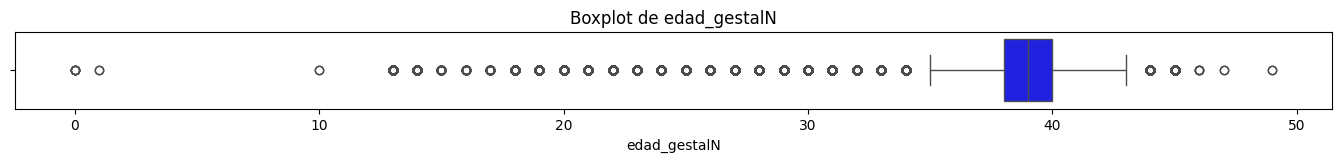

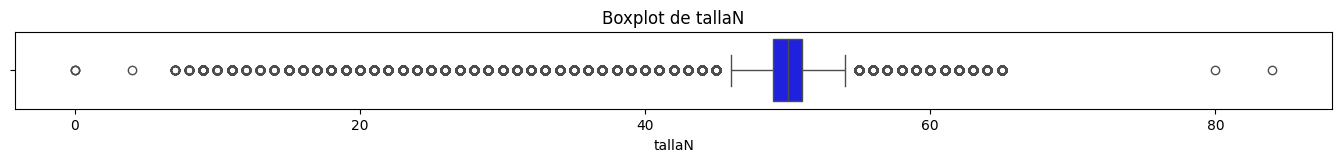

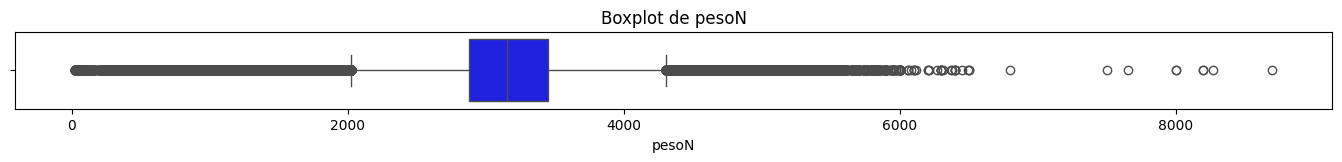

In [14]:
for column in Nacimientos_df.columns[1:]:
    plt.figure(figsize=(17, 1))
    sns.boxplot(data=Nacimientos_df, x=column, color='blue')
    plt.title(f'Boxplot de {column}')
    plt.show()

## Moon Dataset

In [15]:
# Ruta al archivo
archivo = 'lunardata.txt'

# Leer el archivo CSV
luna = pd.read_csv(archivo)

# Mostrar las primeras filas del DataFrame
luna.head()


,year,month,day,luna
0,1992,1,4,0
1,1992,1,5,1
2,1992,1,6,2
3,1992,1,7,3
4,1992,1,8,4


In [16]:
luna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    13135 non-null  int64
 1   month   13135 non-null  int64
 2   day     13135 non-null  int64
 3   luna    13135 non-null  int64
dtypes: int64(4)
memory usage: 410.6 KB


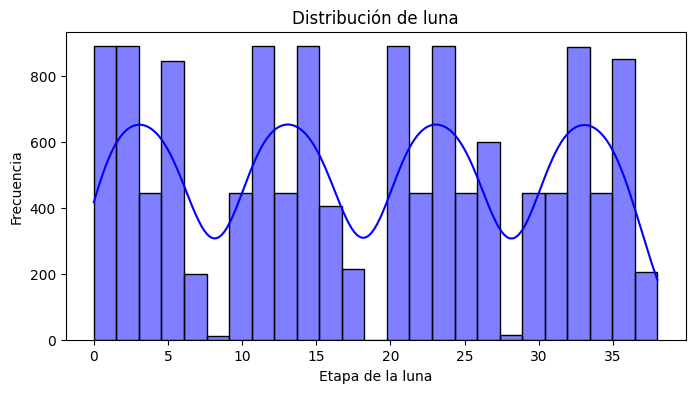

In [17]:
    plt.figure(figsize=(8, 4))  # Tamaño de la gráfica
    sns.histplot(luna['luna'], kde=True, color='blue')  # Crea un histograma con una línea de densidad
    plt.title(f'Distribución de luna')  # Título de la gráfica
    plt.xlabel('Etapa de la luna')  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.show()

In [18]:
counts_by_edad_gestal = Nacimientos_df.groupby("edad_gestalN").size()
counts_by_edad_gestal =pd.DataFrame(counts_by_edad_gestal)
counts_by_edad_gestal = counts_by_edad_gestal.rename(columns={0: 'count'})
counts_by_edad_gestal

,count
edad_gestalN,
0.0,6
1.0,2
10.0,2
13.0,488
14.0,217
15.0,46
16.0,31
17.0,37
18.0,270


C:\Users\adrpm\AppData\Local\Temp\ipykernel_4084\2624704249.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = counts_by_edad_gestal.groupby('edad_gestalN_bin')['count'].sum().reset_index()


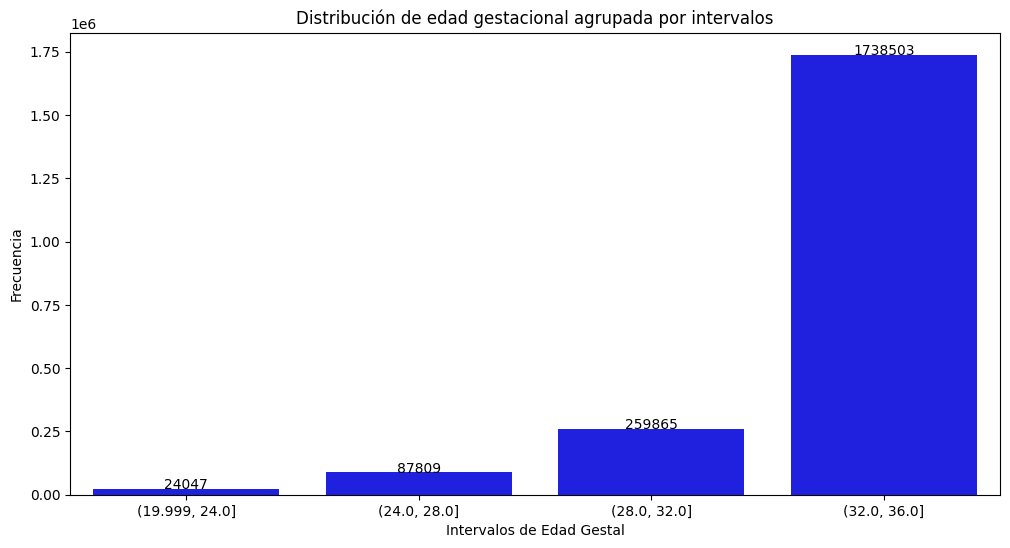

In [19]:
counts_by_edad_gestal.reset_index(inplace=True)

# Definir los intervalos de agrupación
bins = [20, 24,28,32,36]

# Agrupar por intervalos de 'edad_gestalN'
counts_by_edad_gestal['edad_gestalN_bin'] = pd.cut(counts_by_edad_gestal['edad_gestalN'], bins, include_lowest=True)

# Contar las ocurrencias en cada intervalo
grouped_counts = counts_by_edad_gestal.groupby('edad_gestalN_bin')['count'].sum().reset_index()

# Crear la gráfica
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
barplot = sns.barplot(x='edad_gestalN_bin', y='count', data=grouped_counts, color='blue')  # Crear un barplot

for index, row in grouped_counts.iterrows():
    barplot.text(index, row['count'] + 50, row['count'], color='black', ha="center")

# Ajustar los títulos y etiquetas
plt.title('Distribución de edad gestacional agrupada por intervalos')  # Título de la gráfica
plt.xlabel('Intervalos de Edad Gestal')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Mostrar la gráfica
plt.show()

C:\Users\adrpm\AppData\Local\Temp\ipykernel_4084\1041525831.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = counts_by_edad_gestal.groupby('edad_gestalN_bin')['count'].sum().reset_index()


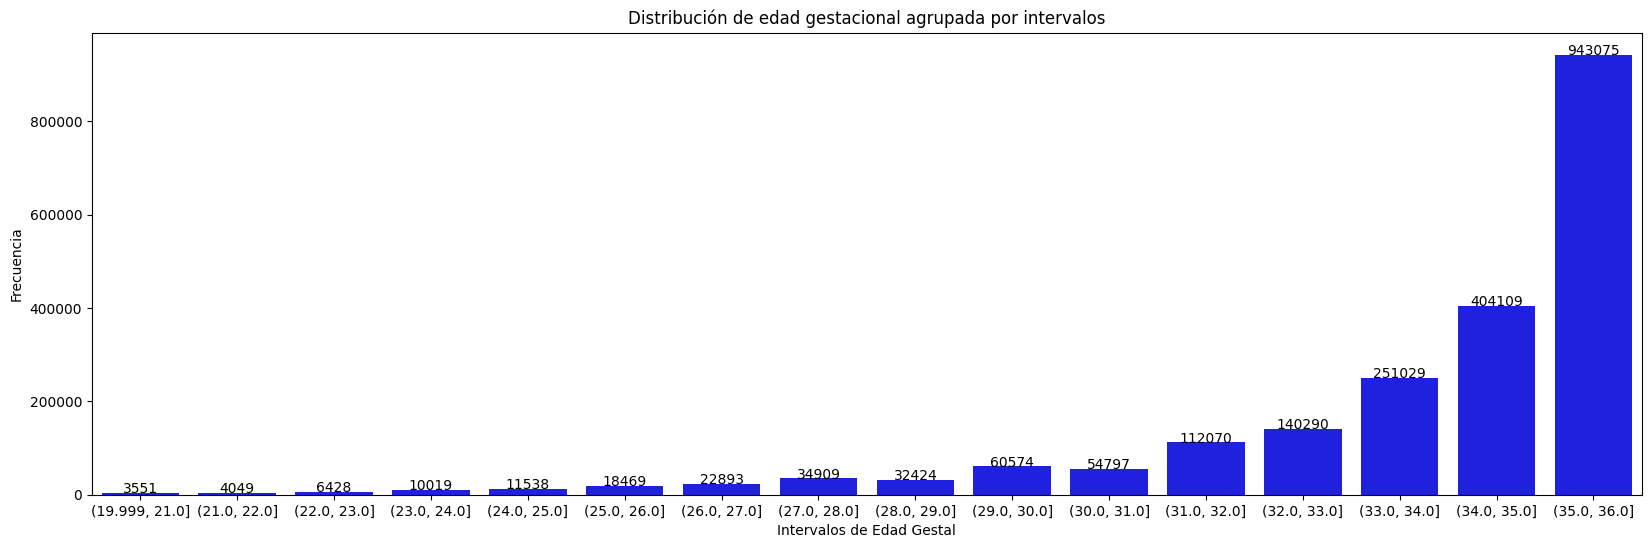

In [20]:
counts_by_edad_gestal.reset_index(inplace=True)

# Definir los intervalos de agrupación
bins = [20, 21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

# Agrupar por intervalos de 'edad_gestalN'
counts_by_edad_gestal['edad_gestalN_bin'] = pd.cut(counts_by_edad_gestal['edad_gestalN'], bins, include_lowest=True)

# Contar las ocurrencias en cada intervalo
grouped_counts = counts_by_edad_gestal.groupby('edad_gestalN_bin')['count'].sum().reset_index()

# Crear la gráfica
plt.figure(figsize=(20, 6))  # Tamaño de la gráfica
barplot = sns.barplot(x='edad_gestalN_bin', y='count', data=grouped_counts, color='blue')  # Crear un barplot

for index, row in grouped_counts.iterrows():
    barplot.text(index, row['count'] + 50, row['count'], color='black', ha="center")

# Ajustar los títulos y etiquetas
plt.title('Distribución de edad gestacional agrupada por intervalos')  # Título de la gráfica
plt.xlabel('Intervalos de Edad Gestal')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Mostrar la gráfica
plt.show()

In [21]:
counts_by_procedimiento = Nacimientos.groupby("procedimiento").size()
counts_by_procedimiento =pd.DataFrame(counts_by_procedimiento)
counts_by_procedimiento = counts_by_procedimiento.rename(columns={0: 'count'})
counts_by_procedimiento

,count
procedimiento,
CESÁREA,12154116
DISTACICO,107363
EUTÓCICO,14040127
FARCEPS,146776
NO ESPECIFICADO,192088
OTRO,3324949


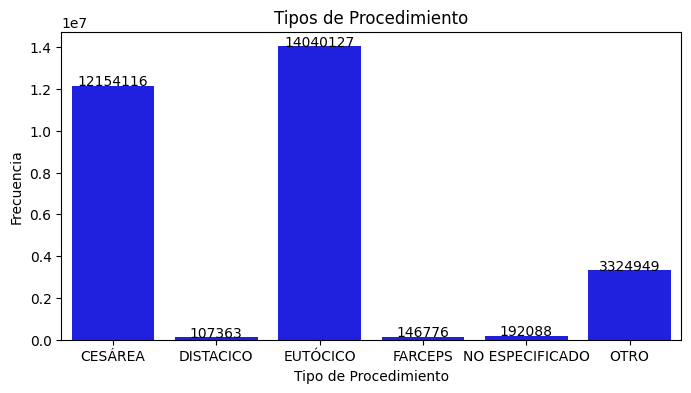

In [41]:
# Crear la gráfica
plt.figure(figsize=(8, 4))  
barplot = sns.barplot(x='procedimiento', y='count', data=counts_by_procedimiento, color='blue')  # Crear un barplot

# Añadir anotaciones sobre cada barra
for index, row in counts_by_procedimiento.iterrows():
    barplot.text(index, row['count'] + 1, row['count'], ha="center")

# Ajustar los títulos y etiquetas
plt.title('Tipos de Procedimiento')  # Título de la gráfica
plt.xlabel('Tipo de Procedimiento')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Mostrar la gráfica
plt.show()

In [38]:
counts_by_luna = luna.groupby("luna").size()
counts_by_luna =pd.DataFrame(counts_by_luna)
counts_by_luna = counts_by_luna.rename(columns={0: 'count'})
counts_by_luna

,count
luna,
0,186
1,186
2,186
3,186
4,186
5,186
6,165
7,86
8,4


C:\Users\adrpm\AppData\Local\Temp\ipykernel_4084\106622321.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = counts_by_luna.groupby('fase_luna')['count'].sum().reset_index()


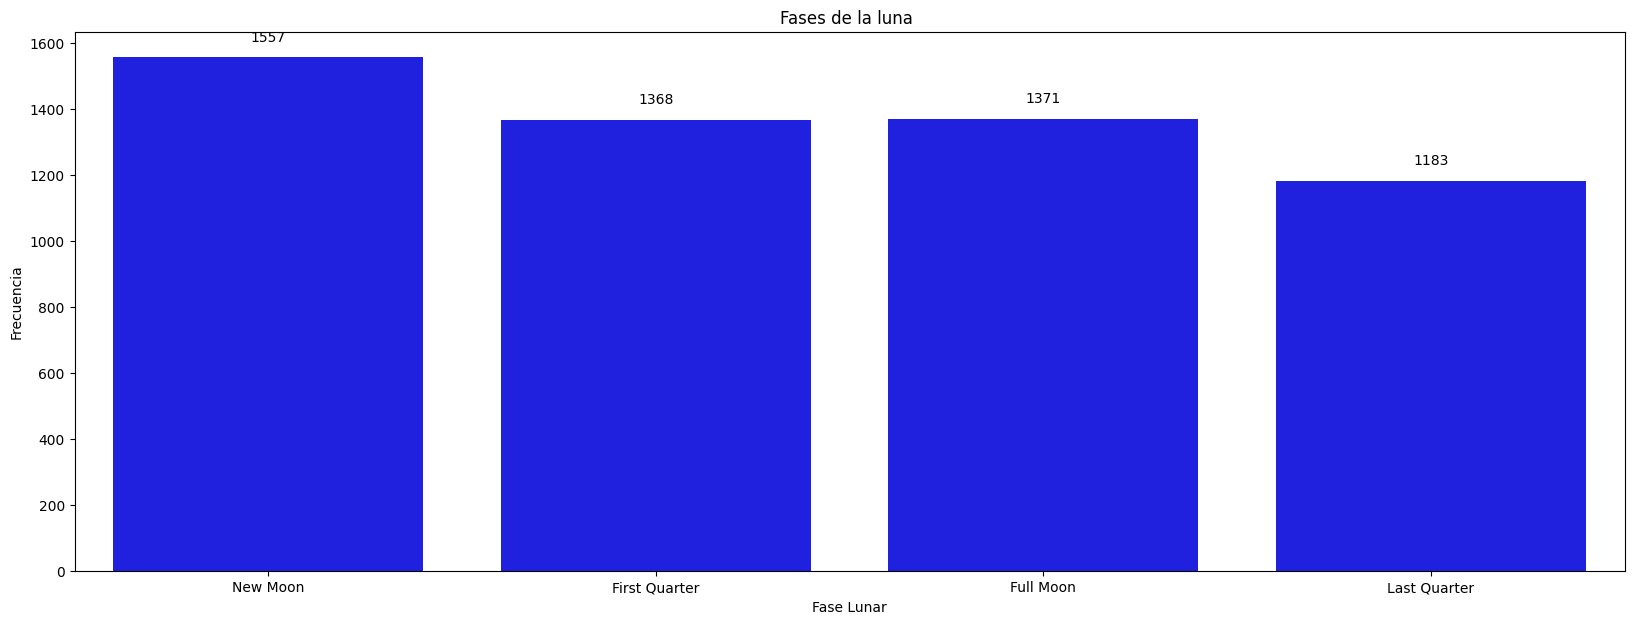

In [42]:
counts_by_luna.reset_index(inplace=True)

# Definir los intervalos de agrupación
bins = [0,10,20,30,40]
labels = ['New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']

# Agrupar por intervalos de 'edad_gestalN'
counts_by_luna['fase_luna'] = pd.cut(counts_by_luna['luna'], bins=bins,labels=labels, include_lowest=True)

# Contar las ocurrencias en cada intervalo
grouped_counts = counts_by_luna.groupby('fase_luna')['count'].sum().reset_index()

# Crear la gráfica
plt.figure(figsize=(20, 7))  # Tamaño de la gráfica
barplot = sns.barplot(x='fase_luna', y='count', data=grouped_counts, color='blue')  # Crear un barplot

for index, row in grouped_counts.iterrows():
    barplot.text(index, row['count'] + 50, row['count'], color='black', ha="center")

# Ajustar los títulos y etiquetas
plt.title('Fases de la luna ')  # Título de la gráfica
plt.xlabel('Fase Lunar')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Mostrar la gráfica
plt.show()

C:\Users\adrpm\AppData\Local\Temp\ipykernel_4084\2374926984.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = counts_by_luna.groupby('fase_luna')['count'].sum().reset_index()


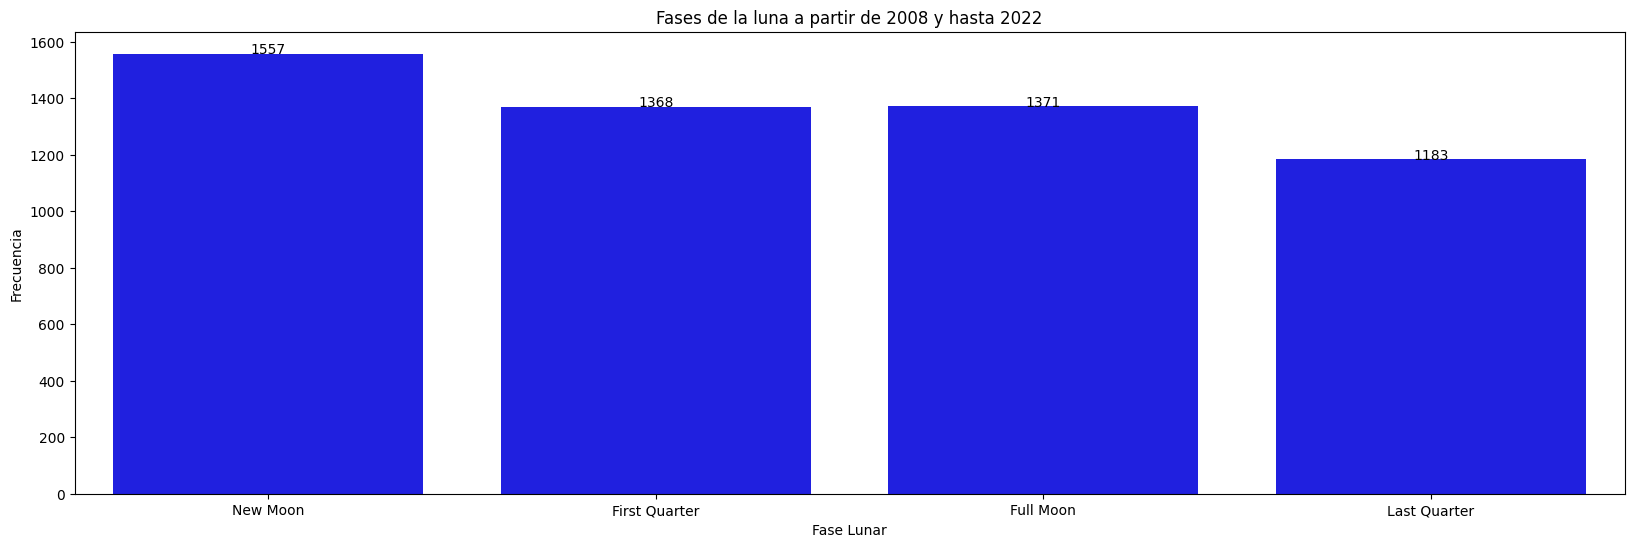

In [43]:
luna = luna[(luna['year'] >= 2008)& (luna['year']<=2022)]

# Agrupar por 'luna' y contar las ocurrencias
counts_by_luna = luna.groupby('luna').size()
counts_by_luna = pd.DataFrame(counts_by_luna, columns=['count'])

# Resetear el índice
counts_by_luna.reset_index(inplace=True)

# Definir los intervalos de agrupación y sus etiquetas
bins = [0, 10, 20, 30, 40]
labels = ['New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']

# Agrupar por intervalos de 'luna' y asignar etiquetas
counts_by_luna['fase_luna'] = pd.cut(counts_by_luna['luna'], bins=bins, labels=labels, include_lowest=True)

# Contar las ocurrencias en cada intervalo
grouped_counts = counts_by_luna.groupby('fase_luna')['count'].sum().reset_index()

# Crear la gráfica
plt.figure(figsize=(20, 6))  # Tamaño de la gráfica
barplot = sns.barplot(x='fase_luna', y='count', data=grouped_counts, color='blue')  # Crear un barplot

# Añadir anotaciones sobre cada barra
for index, row in grouped_counts.iterrows():
    barplot.text(index, row['count'] + 1, row['count'], color='black', ha="center")

# Ajustar los títulos y etiquetas
plt.title('Fases de la luna a partir de 2008 y hasta 2022')  # Título de la gráfica
plt.xlabel('Fase Lunar')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y

# Mostrar la gráfica
plt.show()

In [26]:
Nacimientos = Nacimientos[(Nacimientos['edad_gestal'] != 99) & 
                                (Nacimientos['talla'] != 99) & 
                                (Nacimientos['peso'] != 9999)]

# Renombrar las columnas sin los valores eliminados
Nacimientos['edad_gestalN'] = Nacimientos['edad_gestal']
Nacimientos['tallaN'] = Nacimientos['talla']
Nacimientos['pesoN'] = Nacimientos['peso']

# Eliminar las columnas originales
Nacimientos = Nacimientos.drop(['edad_gestal', 'peso', 'talla'], axis=1)

# Mostrar las primeras filas del DataFrame resultante
print(Nacimientos.head())


    fecha_nac procedimiento         entidad  sexo  edad_gestalN  tallaN  pesoN
0  31/10/2008       CESÁREA  AGUASCALIENTES   NaN            38      50   3500
1  27/02/2008       CESÁREA  AGUASCALIENTES   NaN            38      50   3250
2  30/01/2008      EUTÓCICO  AGUASCALIENTES   NaN            40      47   3020
3  11/08/2008       CESÁREA  AGUASCALIENTES   NaN            39      50   4050
4  12/05/2008      EUTÓCICO  AGUASCALIENTES   NaN            38      49   2700


In [27]:
from scipy.stats import normaltest

# Seleccionar las últimas tres columnas del DataFrame
columns_to_test = Nacimientos_df.columns[-3:]

# Realizar las pruebas de D'Agostino y Pearson para cada columna
for column in columns_to_test:
    data = Nacimientos_df[column].dropna()
    stat, p_value = normaltest(data)
    print(f'Test de D\'Agostino y Pearson para {column}: stat={stat:.3f}, p_value={p_value:.3e}')
    
    alpha = 0.05
    if p_value > alpha:
        print(f'No se puede rechazar la hipótesis nula: Los datos de {column} parecen seguir una distribución normal.\n')
    else:
        print(f'Se rechaza la hipótesis nula: Los datos de {column} no siguen una distribución normal.\n')


Test de D'Agostino y Pearson para edad_gestalN: stat=18138787.090, p_value=0.000e+00
Se rechaza la hipótesis nula: Los datos de edad_gestalN no siguen una distribución normal.

Test de D'Agostino y Pearson para tallaN: stat=11641397.844, p_value=0.000e+00
Se rechaza la hipótesis nula: Los datos de tallaN no siguen una distribución normal.

Test de D'Agostino y Pearson para pesoN: stat=3263279.779, p_value=0.000e+00
Se rechaza la hipótesis nula: Los datos de pesoN no siguen una distribución normal.



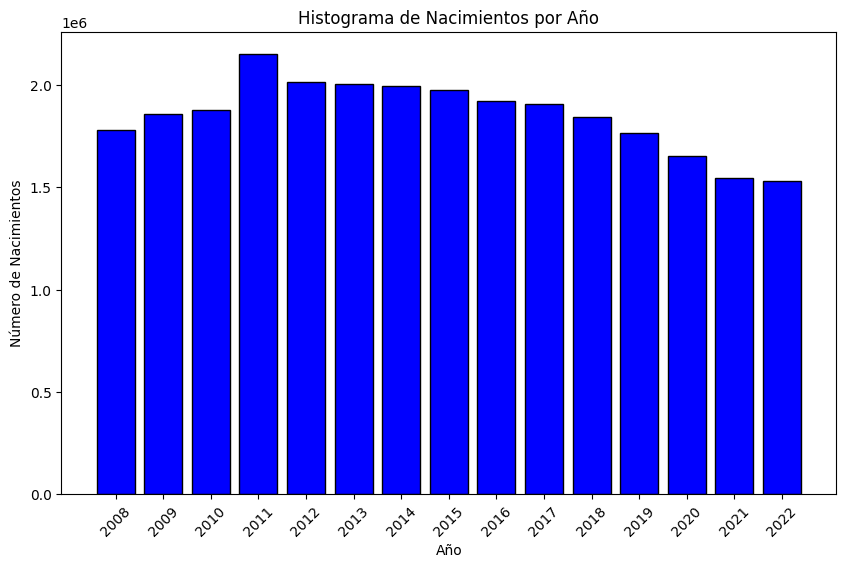

In [44]:
# Asegúrate de que la columna fecha_nac esté en formato datetime
Nacimientos['fecha_nac'] = pd.to_datetime(Nacimientos['fecha_nac'], format='%d/%m/%Y')

# Crear una nueva columna con el año
Nacimientos['año_nac'] = Nacimientos['fecha_nac'].dt.year

# Calcular la frecuencia de nacimientos por año
nacimientos_por_año = Nacimientos['año_nac'].value_counts().sort_index()

# Crear un DataFrame con la frecuencia
df_nacimientos_por_año = pd.DataFrame({'Año': nacimientos_por_año.index, 'Frecuencia': nacimientos_por_año.values})

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Configurar el ancho de las barras y 
bar_width = 0.8
bar_positions = df_nacimientos_por_año['Año']

# Crear el gráfico de barras
plt.bar(bar_positions, df_nacimientos_por_año['Frecuencia'], width=bar_width, edgecolor='black', color='blue')

# Ajustar las etiquetas del eje x
plt.xticks(df_nacimientos_por_año['Año'], rotation=45)

# Añadir títulos y etiquetas
plt.title('Histograma de Nacimientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Nacimientos')

# Mostrar la gráfica
plt.show()

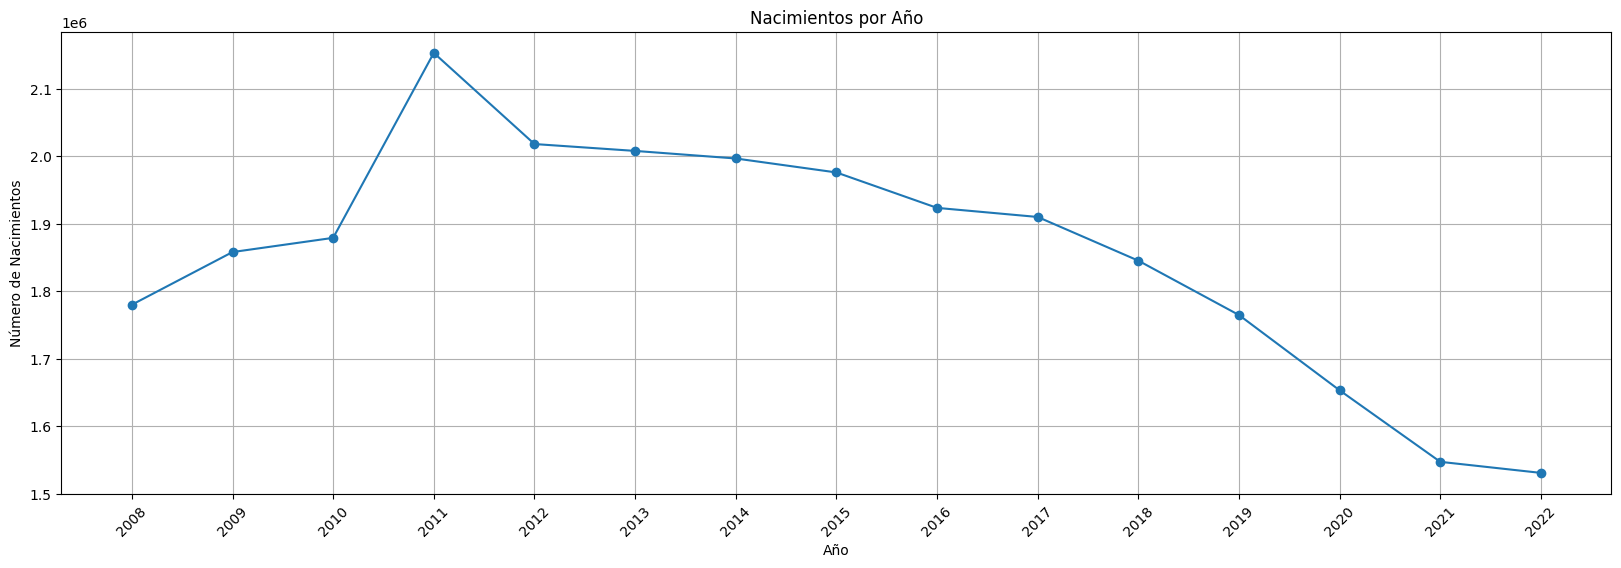

In [45]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 6))

# Crear el gráfico de líneas
plt.plot(df_nacimientos_por_año['Año'], df_nacimientos_por_año['Frecuencia'], marker='o', linestyle='-')

# Añadir títulos y etiquetas
plt.title('Nacimientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Nacimientos')

# Ajustar las etiquetas del eje x
plt.xticks(df_nacimientos_por_año['Año'], rotation=45)

# Mostrar la gráfica
plt.grid(True)
plt.show()


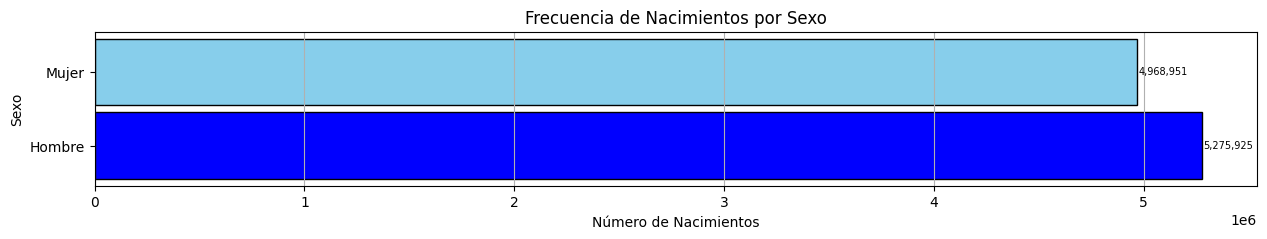

In [95]:

Nacimientos_filtrado = Nacimientos[Nacimientos['sexo'].isin([1, 2])]

# Calcular la frecuencia de cada valor de sexo después de filtrar
frecuencia_sexo = (Nacimientos_filtrado['sexo'].value_counts())

# Definir las etiquetas basadas en los valores únicos filtrados
labels = ['Hombre', 'Mujer']

# Crear el gráfico de barras horizontal
plt.figure(figsize=(15, 2))
bars = plt.barh(labels, frecuencia_sexo, color=['blue', 'skyblue'], height=0.9,edgecolor='black')

# Añadir las etiquetas de frecuencia en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5000, bar.get_y() + bar.get_height()/2, f'{int(width):,}', ha='left', va='center', fontsize=7, color='black')

# Añadir títulos y etiquetas
plt.title('Frecuencia de Nacimientos por Sexo')
plt.xlabel('Número de Nacimientos')
plt.ylabel('Sexo')
plt.grid(axis='x')

# Mostrar la gráfica
plt.show()


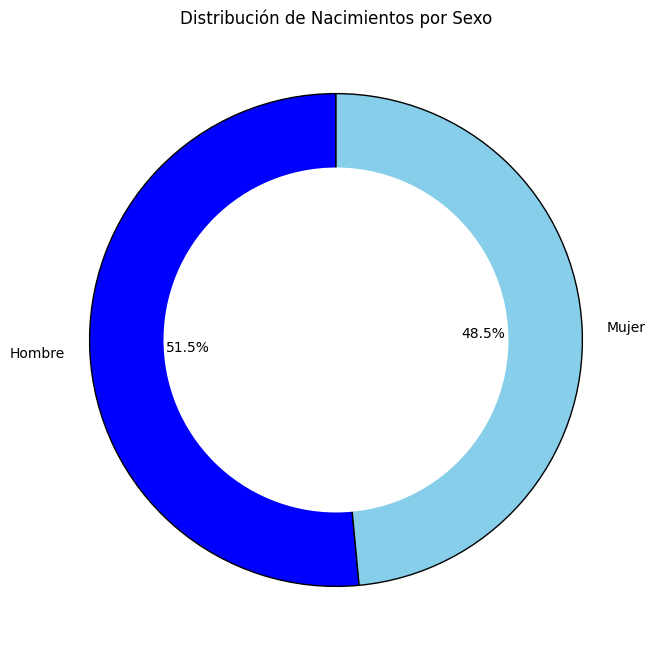

In [71]:
Nacimientos_filtrado = Nacimientos[Nacimientos['sexo'].isin([1, 2])]

# Calcular la frecuencia de cada valor de sexo después de filtrar
frecuencia_sexo = Nacimientos_filtrado['sexo'].value_counts()

# Definir las etiquetas basadas en los valores únicos filtrados
labels = ['Hombre', 'Mujer']

# Crear el gráfico de donut
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_sexo, labels=labels, colors=['blue', 'skyblue'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Dibujar un círculo en el centro para crear el efecto de donut
centro_circulo = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Añadir título
plt.title('Distribución de Nacimientos por Sexo')

# Mostrar la gráfica
plt.show()

C:\Users\adrpm\AppData\Local\Temp\ipykernel_4084\2619553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sexo', data=df_pictograma, palette=['blue', 'skyblue'])


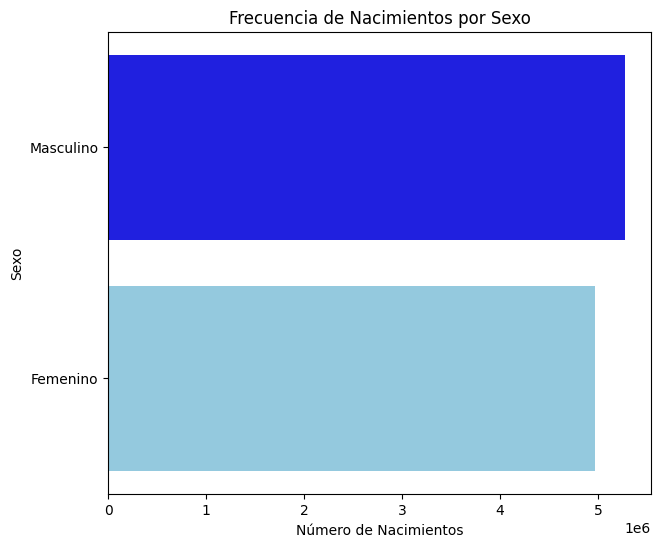